In [1]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np
from plotnine import *

In [2]:
hours = [
    0.5, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 
    2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50,  
    4.00, 4.25, 4.50, 4.75, 5.00, 5.50
]

passed = [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1]

students = pd.DataFrame({'hours' : hours, 'passed' : passed})
students

,hours,passed
0,0.50,0
1,0.75,0
2,1.00,0
3,1.25,0
4,1.50,0
5,1.75,0
6,1.75,1
7,2.00,0
8,2.25,1
9,2.50,0


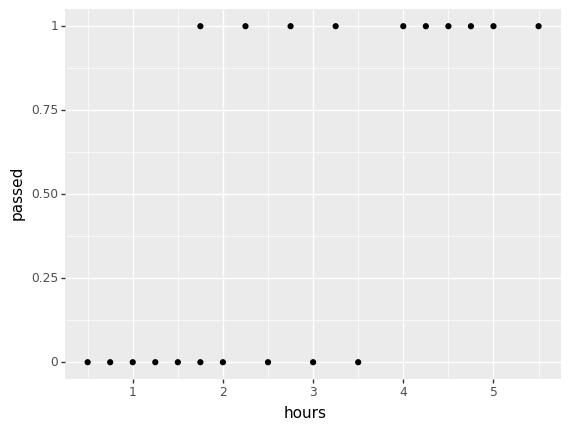

<ggplot: (8752865583960)>

In [4]:
ggplot(data=students) +\
    geom_point(mapping=aes(x="hours", y="passed"))

In [5]:
students_mod = smf.ols("passed ~ hours", data=students)
students_res = students_mod.fit()
students_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 passed   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     16.29
Date:                Thu, 23 Feb 2023   Prob (F-statistic):           0.000775
Time:                        16:16:50   Log-Likelihood:                -8.0712
No. Observations:                  20   AIC:                             20.14
Df Residuals:                      18   BIC:                             22.13
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1539      0.183     -0.840      0.412      -0.539       0.231
hours          0.2346      0.058      4.036      0.001       0.112       0.357
==============================================================================
Omnibus:                        0.367   Durbin-Watson:                   3.416
Prob(Omnibus):                  0.832   Jarque-Bera (JB):                0.381
Skew:                           0.270   Prob(JB):                        0.827
Kurtosis:                       2.594   Cond. No.                         7.30
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

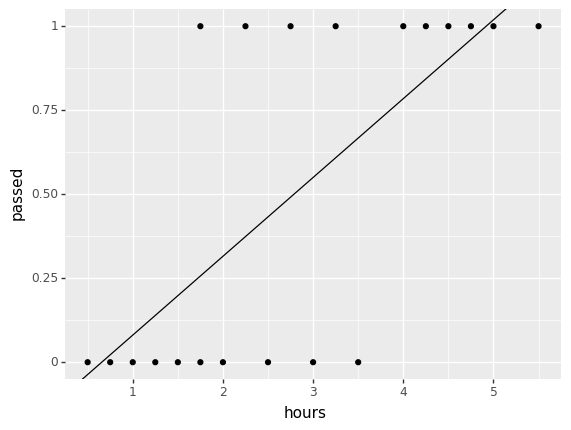

<ggplot: (8752864952829)>

In [6]:
ggplot(data=students) +\
    geom_point(mapping=aes(x="hours", y="passed")) +\
    geom_abline(intercept=students_res.params['Intercept'], slope=students_res.params['hours'])

In [8]:
from statsmodels.formula.api import logit
students_logit_mod = logit("passed ~ hours", data=students)
students_logit_res = students_logit_mod.fit()
students_logit_res.summary()

Optimization terminated successfully.
         Current function value: 0.401494
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 passed   No. Observations:                   20
Model:                          Logit   Df Residuals:                       18
Method:                           MLE   Df Model:                            1
Date:                Thu, 23 Feb 2023   Pseudo R-squ.:                  0.4208
Time:                        16:26:29   Log-Likelihood:                -8.0299
converged:                       True   LL-Null:                       -13.863
Covariance Type:            nonrobust   LLR p-value:                 0.0006365
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.0777      1.761     -2.316      0.021      -7.529      -0.626
hours          1.5046      0.629      2.393      0.017       0.272       2.737
==============================================================================
"""

In [9]:
passed_predicted = students_logit_res.predict(students['hours'])
passed_predicted

0     0.034710
1     0.049773
2     0.070892
3     0.100029
4     0.139344
5     0.190837
6     0.190837
7     0.255703
8     0.333530
9     0.421627
10    0.515011
11    0.607359
12    0.692617
13    0.766481
14    0.874448
15    0.910278
16    0.936624
17    0.955611
18    0.969097
19    0.985194
dtype: float64

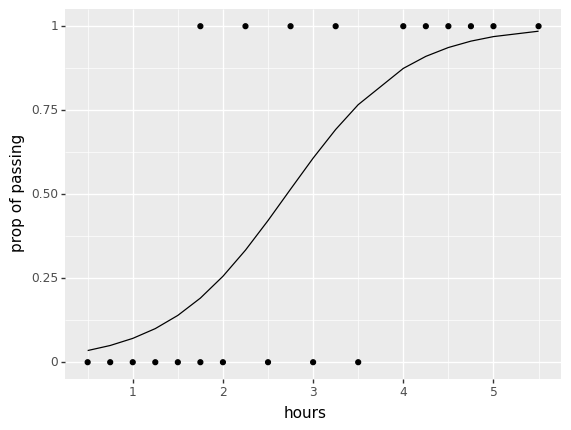

<ggplot: (8752862757136)>

In [13]:
ggplot(data=students) +\
    geom_point(aes(x='hours', y='passed')) +\
    geom_line(aes(x='hours', y='passed_predicted')) +\
    labs(y='prop of passing')


In [18]:
example_study_hours = np.arange(1, 6)
intercept = students_logit_res.params['Intercept']
hours_coeff = students_logit_res.params['hours']
propability_passing = 1 / (1 + np.exp(-intercept - hours_coeff*example_study_hours))

print('study hours;', example_study_hours)
print("prop of passing", propability_passing)

study hours; [1 2 3 4 5]
prop of passing [0.07089196 0.25570318 0.60735865 0.8744475  0.96909707]


In [19]:
print(sm.datasets.fair.SOURCE)


Fair, Ray. 1978. "A Theory of Extramarital Affairs," `Journal of Political
Economy`, February, 45-61.

The data is available at http://fairmodel.econ.yale.edu/rayfair/pdf/2011b.htm



In [20]:
print(sm.datasets.fair.NOTE)

::

    Number of observations: 6366
    Number of variables: 9
    Variable name definitions:

        rate_marriage   : How rate marriage, 1 = very poor, 2 = poor, 3 = fair,
                        4 = good, 5 = very good
        age             : Age
        yrs_married     : No. years married. Interval approximations. See
                        original paper for detailed explanation.
        children        : No. children
        religious       : How relgious, 1 = not, 2 = mildly, 3 = fairly,
                        4 = strongly
        educ            : Level of education, 9 = grade school, 12 = high
                        school, 14 = some college, 16 = college graduate,
                        17 = some graduate school, 20 = advanced degree
        occupation      : 1 = student, 2 = farming, agriculture; semi-skilled,
                        or unskilled worker; 3 = white-colloar; 4 = teacher
                        counselor social worker, nurse; artist, writers;
          

In [22]:
affair_df = sm.datasets.fair.load_pandas().data
affair_df


,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666
...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000


In [31]:
affair_df['affair'] = (affair_df['affairs'] > 0).astype(float)
affair_df.sort_values(by='affair', inplace=True)
affair_df.reset_index(inplace=True, drop=True)
affair_df

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,5.0,22.0,0.5,0.0,4.0,16.0,4.0,2.0,0.000000,0.0
1,4.0,42.0,23.0,4.0,2.0,14.0,6.0,2.0,0.000000,0.0
2,5.0,22.0,2.5,1.0,3.0,14.0,3.0,5.0,0.000000,0.0
3,5.0,22.0,2.5,0.0,3.0,17.0,5.0,5.0,0.000000,0.0
4,5.0,37.0,13.0,2.0,2.0,16.0,5.0,2.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...
6361,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1.0
6362,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1.0
6363,4.0,22.0,2.5,0.0,2.0,14.0,1.0,1.0,0.400000,1.0
6364,3.0,27.0,9.0,2.0,1.0,14.0,4.0,2.0,1.333333,1.0


In [33]:
affair_df['affair'].sum() / affair_df['affair'].count()

0.3224945020420987

In [36]:
affairs_mod = logit("affair ~ occupation + educ + occupation_husb"
                   " + rate_marriage + age + yrs_married + children"
                   " + religious", data=affair_df).fit()
affairs_mod.summary()

Optimization terminated successfully.
         Current function value: 0.545314
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 affair   No. Observations:                 6366
Model:                          Logit   Df Residuals:                     6357
Method:                           MLE   Df Model:                            8
Date:                Thu, 23 Feb 2023   Pseudo R-squ.:                  0.1327
Time:                        17:21:51   Log-Likelihood:                -3471.5
converged:                       True   LL-Null:                       -4002.5
Covariance Type:            nonrobust   LLR p-value:                5.807e-224
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.7257      0.299     12.470      0.000       3.140       4.311
occupation          0.1602      0.034      4.717      0.000       0.094       0.227
educ               -0.0392      0.015     -2.533      0.011      -0.070      -0.009
occupation_husb     0.0124      0.023      0.541      0.589      -0.033       0.057
rate_marriage      -0.7161      0.031    -22.784      0.000      -0.778      -0.655
age                -0.0605      0.010     -5.885      0.000      -0.081      -0.040
yrs_married         0.1100      0.011     10.054      0.000       0.089       0.131
children           -0.0042      0.032     -0.134      0.893      -0.066       0.058
religious          -0.3752      0.035    -10.792      0.000      -0.443      -0.307
===================================================================================
"""

In [44]:
affairs_mod.params['occupation']


0.16023383319082452

In [42]:
affairs_mod.params['yrs_married']

0.11001794098251541

In [46]:
affairs_mod.params['religious']

-0.37515765268392903